# The 2 point correlation function, growth of large scales structures, and Baryon Acoustic Oscillations

## Authors
Jeff McMahon, Lindsey Bleem, and Alex Drlica Wagner

  Dedicated in the memory of Jeff's dad Tim who was always curious, always adventurous, and proud of him no matter what he did.

## Background

It is well established that the Universe began in a hot dense state and expanded thereafter.  The initial conditions of this state are broadly consistent with the predictions of the inflationary paradigm. This paradigm predicts a minuscule spectrum of density perturbations generated from quantum fluctuations in the first  $\sim 10^{-32}$ s.  These density perturbations then evolve under the influence of gravitational and (counteracting) pressure forces: overdense regions collapse leading to regions of high pressure in the photon-baryon fluid and then subsequently expand owing to this pressure (and then subsequently recollapse, etc).  These oscillatory dynamics are acoustic oscillations. 


Accoustic Oscillations (source Wayne Hu)

<div>
<img src="http://background.uchicago.edu/~whu/intermediate/basicoscil.gif" width="300"/>
</div>


As the universe expands, it cools to the point where electrons and protons combine to form neutral hydrogen (recombination).  From this time onward the photons are no longer coupled to the baryons.  This is the time at which the CMB is emitted (redshift ~1100) and the imprint of these acoustic oscillations explains the hot and cold spots of the CMB.  In particular the first (and tallest) acoustic peak of the CMB corresponds to the angular scale (wavelength) at which matter has just collapsed to its maximum density.  At angular scales larger than this, the finite speed of sound in the photon-baryon fluid and the finite age of the universe limited the amount of collapse possible.   The physical scale of this peak is determined by the sound speed in the early universe and the time at which decoupling happens.  This is called the sound horizon.   Since the speed of sound and time of decoupling are known, the first peak represents a **standard ruler** and the measurement of its angular scale provides the most precise constraint that our universe is spatially flat. 

Decoupling also changes the evolution of the acoustic oscillations.  After this time, the photons no longer contribute pressure and the baryon fluid starts to collapse.  Thus the inflationary signal that gives rise to the CMB anisotropy also seeds the formation of large scale structures (LSS, hereafter).   Measurements of the spatial spectrum of LSS consequently provides a complementary constraint on cosmological parameters.  One key difference between the CMB and these structures is that we can observe them in three dimensions: as two spatial directions on the sky (e.g., Right Ascension and Declination on the celestial sphere), and---along the line of sight---redshift.  Mapping LSS provides an avenue to measure the growth of structure and trace its evolution.  

The full spectrum is needed to harvest all possible information.  However, just as the CMB has peaks which represent special, and easy to understand features, so does the spectrum of LSS.  The relevant feature arises from Baryon Acoustic Oscillations (BAO) as follows.  At the time of decoupling the sound horizon gives a scale with a maximum overdensity.  Upon decoupling, with no photon pressure to resist further collapse, structures grow at all scales. However, since the scale corresponding to the sound horizon is the most overdense at this time, it is expected to have an enhancement of collapsed structures (galaxies, gas, etc.).  It constitutes an additional standard ruler for cosmological measurements.   It can be observed by tracing the neutral hydrogen at high redshift, or by tracing the overdensity of galaxies at lower redshifts.  By observing the BAO in multiple redshift slices, one can reconstruct the angular diameter distance as a function of redshift.  This provides a sensitive probe of dark energy, neutrino masses, the Hubble constant, and other cosmological parameters.  


Artist rendition of BAO signature imprinted in galaxy distribution (Zosia Rostomian, LBL)
<div>
<img src="https://newscenter.lbl.gov/wp-content/uploads/sites/2/BOSS-BAO.jpg" width="400"/>
</div>


The BAO feature in galaxy surveys was first detected with spectroscopic measurements of galaxies observed at optical wavelengths by SDSS and 2dFGRS. 
Since then multiple teams have confirmed and improved these measurements.  Notably, DESI is currently in the process of obtaining over 30 million galaxy and quasar redshifts with the goal of making the most ambitious measurement to date.   

Just as the first peak is measured by computing the angular power spectrum of the CMB, the BAO are measured by computing the matter power spectrum or a related quantity---the 2 point correlation function.  It is important to note that the 2 point correlation evolves with redshift and contains much more information beyond the BAO feature. For example the evolution of the spectrum traces the evolution and growth of structure.


## Notebook Goals
In this notebook you will gain hands-on experience working with spectroscopic data to measure statistical measurements of galaxy clustering by calculating the angular two-point (2pt) correlation function.  You will develop and apply a correlation function analysis to galaxies from the SDSS spectroscopic sample.  This tutorial follows an analysis of early SDSS data by [Connolly et al. 2001](https://arxiv.org/abs/astro-ph/0107417), and, by the end, you will have produced a figure similar to their [Figure 1](https://arxiv.org/pdf/astro-ph/0107417.pdf#page=7).  We will discuss extensions to this simple analysis.

In [1]:
# Standard python imports
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Data Used
The data will be drawn from the Sloan Digitial Sky Survye (SDSS) Data release 16 (DR16).  These data can be queried here http://skyserver.sdss.org/dr16/en/tools/search/SQS.aspx.  We have downloaded three tables giving redshfit, ra, dec, and color inforamtion for objects classified as galaxies over a 5x5 degree region. The three sets span the redshift ranges of $0.08<𝑧<0.12$, $0.4<𝑧<0.5$ and $0.6<𝑧<0.9$.  The region is from RA 0 to 5 degrees and Dec. 0 to 5 degrees.  For ease of use we have downloaded tables containing these data for you. The columns of these data are descirbed in the comments in the cells below.


In [2]:
# read in the data

low_Z_spec_galaxies = np.loadtxt("SDSS_spextral_galaxies_z0.1to0.2_wide.csv",delimiter = ",", skiprows=2,usecols=(3,12,13,14,15,16,19,20))
mid_Z_spec_galaxies = np.loadtxt("SDSS_spextral_galaxies_z0.4to0.5_wide.csv",delimiter = ",", skiprows=2,usecols=(3,12,13,14,15,16,19,20))
high_Z_spec_galaxies = np.loadtxt("SDSS_spextral_galaxies_z0.6to0.9_wide.csv",delimiter = ",", skiprows=2,usecols=(3,12,13,14,15,16,19,20))


## column ids
# 0  z (redshift)
# 1  ra  (Right Ascension)
# 2  dec (Declination)
# 3  r magnitude   (red)
# 4  u magnitude   (Ultra Violet)
# 5  g magnitude   (green)
# 6  u-g color
# 7  g-r color (redness)
 


## Playing with and visualizing the data

### Spatial distribution of objects

As a first check, let's plot the spatial distributions of objects in our sample.

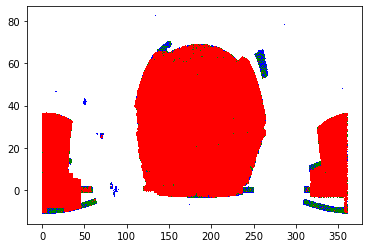

In [3]:
plt.plot(low_Z_spec_galaxies[:,1],low_Z_spec_galaxies[:,2],"b,")
plt.plot(mid_Z_spec_galaxies[:,1],mid_Z_spec_galaxies[:,2],"g,")
plt.plot(high_Z_spec_galaxies[:,1],high_Z_spec_galaxies[:,2],"r,")
plt.show()



To reduce the computaitonal challenge of carrying out our analysis, let's select a subset of these data that lie in a square patch.

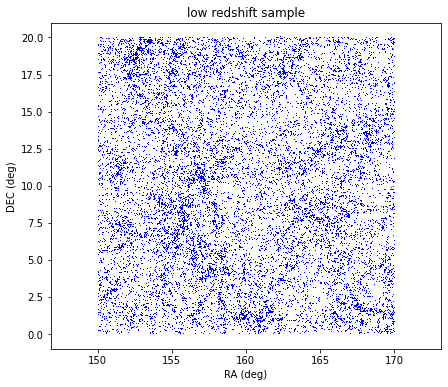

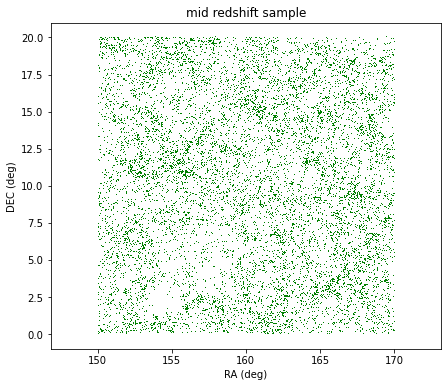

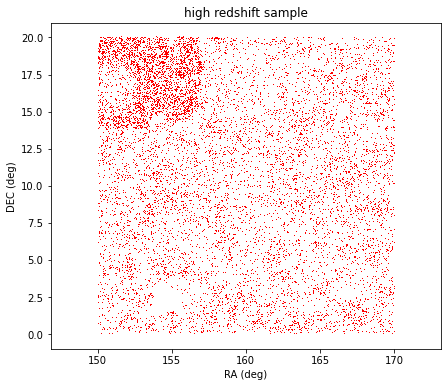

In [4]:
## write a fuction to select objects in a square patch
def select_objects_in_radec_range(map_,ra_min,ra_max,dec_min,dec_max):
    dec_ok = np.logical_and(map_[:,1] > ra_min,map_[:,1] < ra_max)
    ra_ok  = np.logical_and(map_[:,2] > dec_min,map_[:,2] < dec_max)
    ok = np.where(np.logical_and(dec_ok,ra_ok))
    return(np.ravel(ok))

## set boundaries for the square
ra_min = 150
ra_max = 170
dec_min = 0
dec_max = 20

## come up with arrays of index values for each of the three redshift slices
ok_low_Z = select_objects_in_radec_range(low_Z_spec_galaxies,ra_min,ra_max,dec_min,dec_max)
ok_mid_Z = select_objects_in_radec_range(mid_Z_spec_galaxies,ra_min,ra_max,dec_min,dec_max)
ok_high_Z = select_objects_in_radec_range(high_Z_spec_galaxies,ra_min,ra_max,dec_min,dec_max)

## plot the spatial distribtuion of galaxies in these tiles
## From Alexander - I have increased the size of the graphs to better see the data
plt.figure(figsize=(7,6))
plt.plot(low_Z_spec_galaxies[ok_low_Z,1],low_Z_spec_galaxies[ok_low_Z,2],"b,",ms=100)
plt.title("low redshift sample")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()
plt.figure(figsize=(7,6))
plt.plot(mid_Z_spec_galaxies[ok_mid_Z,1],mid_Z_spec_galaxies[ok_mid_Z,2],"g,")
plt.title("mid redshift sample")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()
plt.figure(figsize=(7,6))
plt.plot(high_Z_spec_galaxies[ok_high_Z,1],high_Z_spec_galaxies[ok_high_Z,2],"r,")
plt.title("high redshift sample")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

In [5]:
#Number of galaxies in sample
print(low_Z_spec_galaxies[ok_low_Z, :].shape)


(17167, 8)


## Exercises

(1) Are these objects randomly distributed?   Talk about the strucutures seen in the low redshift sample in particular.

(2) Are the distribtions of objects in the low, mid, and high redshfits maps the same?  Talk about why you would expext the stuctures not to be common.  Discuss whether the clumpiness is the same or different and why you would expect it to be different in the different maps.  (Note, ignore the strange feature in the upper left of the high redshfits sample for this question).

(3) What do you think the strange feature in the upper left of the high redshift sample is?

**Question 1:**
The objects seem to be somewhat randomly distributed, yet not in a completely uniform distribution.
There are strands/filaments of higher density, and between these filaments there are regions with lower density, i.e. voids

In the low redshift sample, the individual filaments have a length of approximately 3-4 degrees.
These filaments can connect to form larger patterns, for example there is a line of filaments from (160,0) to (155,10)
Conversely, the voids occupy the space in between these lines, for example from (157, 15) to (168, 16)

**Question 2:**
The distribution of the objects is quite clumped (meaning there are clearly distinct filaments and clear voids, the difference in density is significant) in the low redshift map.
In the medium redshift map, the objects still clump, but the difference in density is smaller, and the objects do not form longer lines but rather only small filaments.
In the low redshift map, the objects have not much clumping, and more closely resemble a uniform distribution.
Therefore, as the redshift of the objects decreases, they tend to have more clumping/distinct structures.

This trend is likely due to the evolution of the Universe.
The universe started out as a much more uniform distribution of matter, which had small deviations/anisotropies represented in the form of slight overdensities and underdensities.
Over long periods of time, these over/underdensities resulted in the distribution of halos and subsequently galaxies/galaxy clusters.
Therefore, it makes sense that as the universe aged (meaning redshift decreased), the distribution of objects became more clumpy due to gravitational effects.

**Question 3:**
The significant overdensity in the upper left corner of the high redshift sample could be due to a galaxy cluster.

### Redshift Evolution

It is obvious from the previous exercise (and set of plots) that the distribution of these obejcts evolves with redshfit.  One advantage of these spectroscopic data is that they have a resolution in redshift with an accuracy better than one part in 1500.  (This accuracy is called R).  Therefore it is possible to measure the distribution of matter along the line of sight as well as in the plane of the sky.  

Here we plot the distribution of galaxies in the RA / redshift plane. 

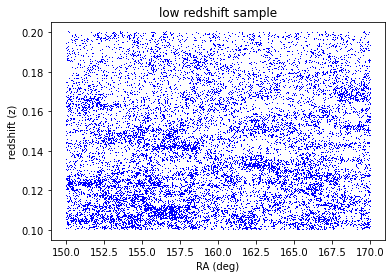

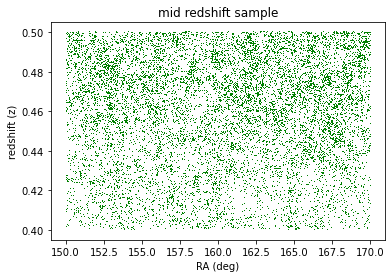

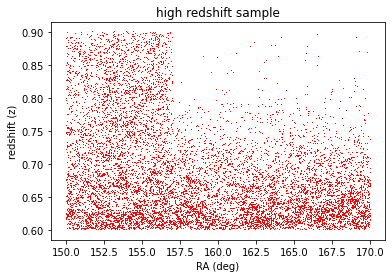

In [6]:
plt.plot(low_Z_spec_galaxies[ok_low_Z,1],low_Z_spec_galaxies[ok_low_Z,0],"b,")
plt.title("low redshift sample")
plt.xlabel("RA (deg)")
plt.ylabel("redshift (z)")
plt.show()

plt.plot(mid_Z_spec_galaxies[ok_mid_Z,1],mid_Z_spec_galaxies[ok_mid_Z,0],"g,")
plt.title("mid redshift sample")
plt.xlabel("RA (deg)")
plt.ylabel("redshift (z)")
plt.show()

plt.plot(high_Z_spec_galaxies[ok_high_Z,1],high_Z_spec_galaxies[ok_high_Z,0],"r,")
plt.title("high redshift sample")
plt.xlabel("RA (deg)")
plt.ylabel("redshift (z)")
plt.show()

## Exercises

(1) What evolution do you see in the lowest redshift slice?  Based on this, is the redshift range too large or about right for measuring the spatial variations in LSS?

(2) Do you see any strange features in the highest redshift slice?  What do you think is causing this?

Question 1:
In the lowest redshift slice, we see that the clumping and density of objects decreases as the redshift increases from 0.1 to 0.2.
Near z=0.1, the filaments and voids are very pronounced and the density variation is large.
Near z=0.2 there are still overdensities and underdensities yet the density is more uniform.
Since we are easily able to visually percieve this change from the plot, the redshift range is about right for measuring the spatial variations in the LSS.

Question 2:
The behaviour of the density of objects with respect to redshift is different for values above and below a right ascenesion of 157 degrees.
For an RA less than 157 deg, the density of objects decreases from z=0.6 to around z=0.7, and remains roughly constant from z=0.7 to z=0.9.
However, for an RA greater than 157 deg, density of objects decreases from z=0.6 to around z=0.7 in the same previous manner, yet the density steeply reduces at z=0.7.
One possible explanation for a reduction in density is an intergalactic void.
Another possible explanation is that there is a line of intergalactic dust or other light-absorbing matter at z=0.7, which absorbs photons from any objects above z=0.7
If ths line of intergalactic dust is roughly perpendicular to our line of sight, this would explain why the border at RA=157 deg is almost perfectly straight, as the dust would cast a "shadow" of sorts.


### Object selection

One other piece of information provided in the data is the nature of the objects.   The objects we have been considering have a "galaxy classification".  This classification is based on morphological measurements from imaging, dividing sources into things that look like point sources (e.g., the PSF of the telescope) and things that are somewhat diffuse.  This sepeartion is not perfect---especially as we go to fainter objects---and some diffuse obects can be related to instrument effects or other astrophysical objects.   One way to probe the nature of the objects is to evaluate the relationship between their color and magniguute. 

Magnitude is the intensity of the light from the object.  This can be bolometric intensity (which is the brightness as observed) or the absolute mangitude which is the intensity with a correction for distance (redshift) so it quantifes the intensity of the light emitted from the galxay.   Intensity is measured on a logarithmic scale with negative intensity values being brighter than positve . Color is quantified by measuring the intensity in different bands and taking the difference.   One convenient feature of the magnitude system adopted by astronomers is that, as it is logarithmic, differencing optical magnitudes provides a ratio of the fluxes in the different filter bands. (E.g., the g-r color = Flux(r)/Flux(g); optional read more: http://spiff.rit.edu/classes/phys440/lectures/color/color.html). 

In the data set provided, we have the red (r), UV (u), and green (g) magnitues, and colors (u-g) and (g-r).  Here we plot the r magnitude vs the g-r color for the low redshift sample.

The SDSS Filter throughput (source https://www.sdss.org/instruments/camera/)
<div>
<img src="https://www.sdss.org/wp-content/uploads/2014/11/camera_filters-300x274.jpg" width="400"/>
</div>

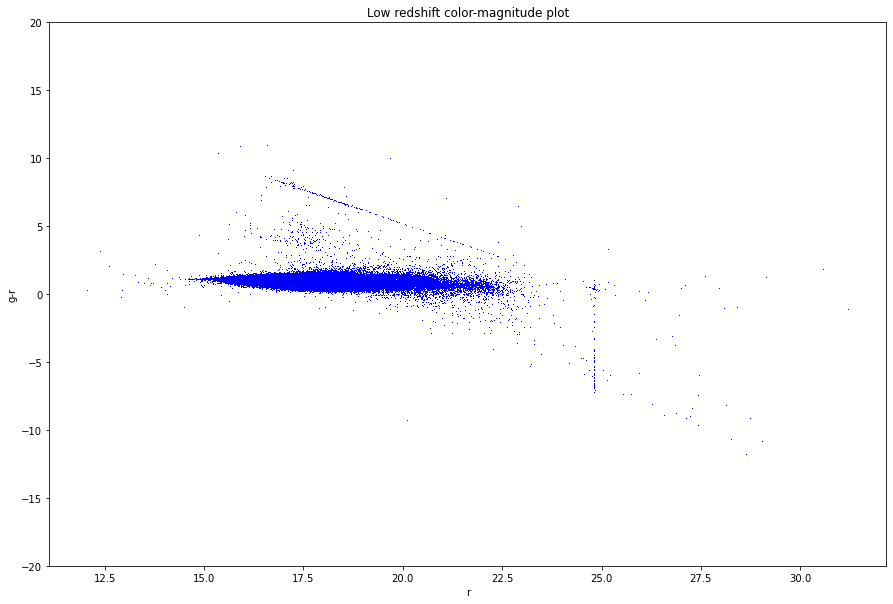

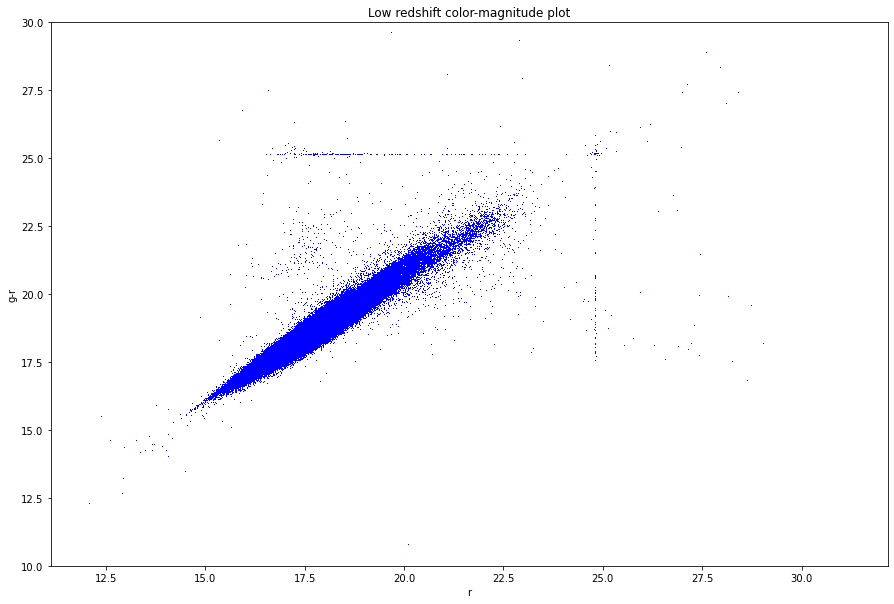

In [7]:
plt.figure(figsize=(15,10))
## From Alexander - I have increased the size of the graphs to better see the data

plt.plot(low_Z_spec_galaxies[:,3],low_Z_spec_galaxies[:,7],"b,")
plt.ylim(-20,20)
plt.title("Low redshift color-magnitude plot")
plt.xlabel("r")
plt.ylabel("g-r")
plt.show()

plt.figure(figsize=(15,10))

plt.plot(low_Z_spec_galaxies[:,3],low_Z_spec_galaxies[:,5],"b,")
plt.ylim(10,30)
plt.title("Low redshift color-magnitude plot")
plt.xlabel("r")
plt.ylabel("g-r")
plt.show()



## Exercise

Are all the objects in this plot well-behaved galaxies?   Do you see any evidence for systematic effects?   Do you see evidence for multiple populations of objects?   How might you seperate these populations for an analysis?


In [8]:
#From the plot, we see that the vast majority of the galaxies are in a single horizontal band.
#This primary band ranges from r=15 to r=22.5 and between g-r=0 and g-r=2.5.
#As a result, for the majority of galaxies, there is no relationship between the colour and r magnitudes.
#Furthermore, although the galaxies in this band have a wide range r magnitudes, their colours are very similar.

#However, not all objects in the plot behave this way.
#There are 2 thinner bands distinct from the main one that exhibit different relationships between r magnitude and colour.

#The second band is a vertical band from g-r=0 to g-r=-7.
#Although these galaxies all have a very similar r magnitude of almost 25, they have a wide range of colours.

#The third band is has a negative slope, and ranges from r=17 to r=22.5 and from g-r=8 to g-r=2.5 (linear equation: (g-r)=-r+25)
#The band itself is very thin, implying a very strong correlation: as r increases, g-r decreases.

#I noticed that these distributions generally do not overlap in terms of their colour:
#The negative sloping band occupies the region from g-r=8 to g-r=2.5,
#the primary band occupies the region from g-r=2.5 to g-r=0,
#and the vertical band occupies the region from g-r=0 to g-r=-7.
#Therefore, in order to seperate these populations for an analysis, we would most likely seperate them by their g-r value,
#As their behaviour would generally depend upon which g-r category they belong in.

#However, we can see that there are sparse outlier galaxies, for example those around r=17.5 and g-r=4.5.
#Although this is within the aforementioned g-r category for the negative sloping band, these galaxies clearly do not follow the negative correlation.
#This, in order to better seperate the 3 populations, we could propose an additional constraint on which galaxies are categorized in each population.
#For example, for the vertical band, we may say that only galaxies with an r magnitude between 24.5 and 25 belong in that population.
#Furthermore, for the negatively sloped band, we may say that only galaxies that are close to the line (g-r)=-r+25 (which is the equation representing the negative slope) will belong in that population.
#These corrections will help remove outliers from the population sets.

# Analysis 

Our goal is to quantify the level of correlation (which is clearly visible by eye) in this data set.  We will focus on the two point angular correlation rather than the 3-d two point correlation which is slightly tricker to implement. This analysis is equivalent, and mathematically related to, a power specturm analysis.
 

First we write code to generate a random distribution of objects.  We will use this as point of comparison for our quantitative treatment of the SDSS data.  

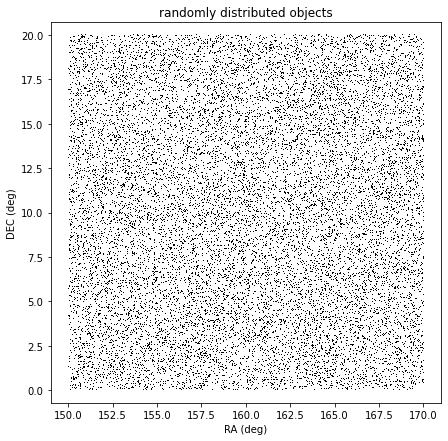

In [9]:
# function to generate ra and dec coordinates for N random objects in a square box in RA and DEC
def generate_random_ra_dec(N,ra_min, ra_max, dec_min, dec_max):
    ra = np.random.uniform(low = ra_min, high = ra_max, size = N)
    dec = np.random.uniform(low = dec_min, high = dec_max, size = N)
    return(ra,dec)

## generate a randomly distribtued set of objects in the same RA, 
## DEC range, and with the same number of objets as our low Z sample
rand_ra,rand_dec = generate_random_ra_dec(np.size(low_Z_spec_galaxies[ok_low_Z,1]),
                                          ra_min, ra_max, dec_min, dec_max)


## plot this randomly distribtued simulation
plt.figure(figsize=(7,7))

plt.plot(rand_ra,rand_dec,"k,")
plt.title("randomly distributed objects")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

## Exercise

Compare this to the plot above of the low-z sample.  What is different?

In [10]:
#The density of objects in the above plot is almost entirely uniform, with no clearly visible significant overdensities or underdensities.
#In contrast, the previous low-z sample had a much more clumped distribution, with visible filaments/lines and voids.

We will now develop the angular two point correlation function.  This function is the probability of finding galaxies as a function of their angular separation.   This can be computed with a simple and ubiquitous tool, the histogram.   Our first job is to compute the histogram of the separation of these data.  

Below is a function that carries this out.  With  forethought we give this function two sets of inputs: (ra1, dec1), and (ra2, dec2).  If we pass the same data in for the first and second data sets then it computes the autocorrelation.  If we pass different data sets then it computes the cross-correlation. We will use this to compute the corrected two point correlation below.

initilized binning


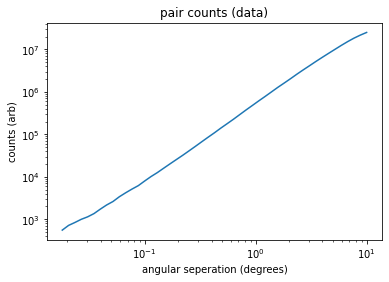

In [11]:
# code to compute the pair counts (histogram)

def pair_counts(ra1,dec1,ra2,dec2,histogram_bins):
    ra1  = np.ravel(ra1)
    dec1 = np.ravel(dec1)
    ra2  = np.ravel(ra2)
    dec2 = np.ravel(dec2)
    N = np.size(ra1)
    i = 0
    while (i < N):
        ra_cur= ra1[i]
        dec_cur = dec1[i]
        distance = np.sqrt((ra2-ra_cur)**2 + (dec2 - dec_cur)**2)
        ok = np.where(distance > 0.01)
        distance = distance[ok]
        if i == 0:
            histogram_out, bin_edges = np.histogram(distance,bins = histogram_bins)
            print("initilized binning")
        histogram_cur, bin_edges = np.histogram(distance,bins = histogram_bins)
        histogram_out += histogram_cur
        i+=1
    return(histogram_out,bin_edges)

## seting up the bins for the pair count
histogram_bins = np.logspace(-1.8,1)

# choosing the data to pass into the pair counts
data_ra  = low_Z_spec_galaxies[ok_low_Z,1]
data_dec = low_Z_spec_galaxies[ok_low_Z,2]



## calcualte the pair counts for the Data
DD,bins = pair_counts(data_ra,data_dec,data_ra,data_dec,histogram_bins)


## plot the pair count histogram for the Data
plt.loglog(bins[1:],DD)
plt.title("pair counts (data)")
plt.xlabel("angular seperation (degrees)")
plt.ylabel("counts (arb)")
plt.show()


## Exercise 

Compute the pair count histogram for the random field and compare it (by plotting both on the same axes) to the histogram from the data.

initilized binning


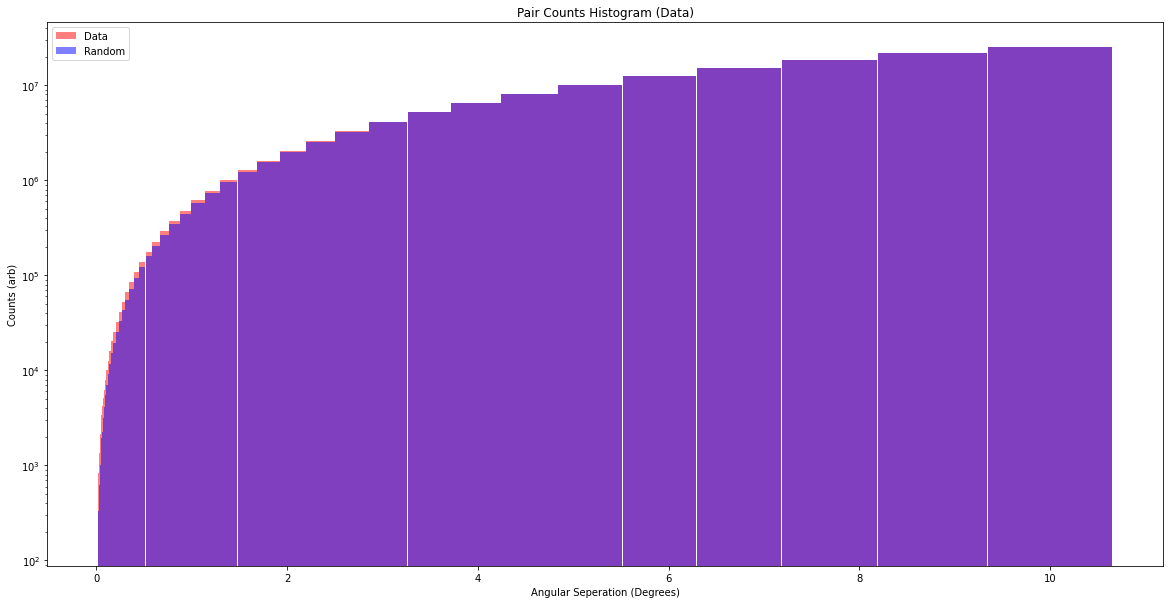

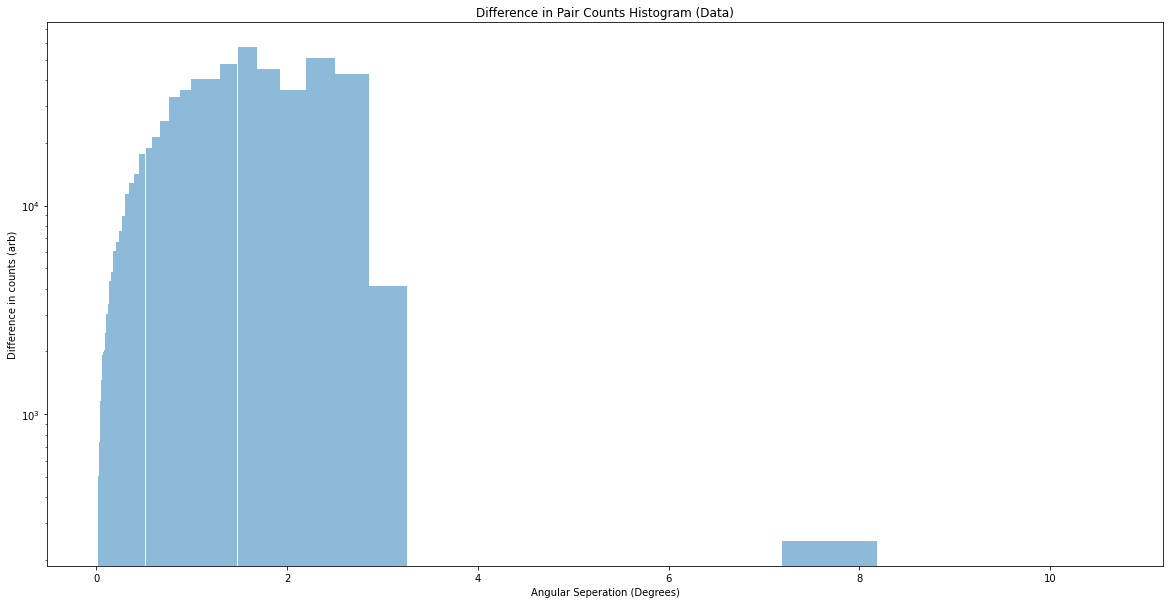

In [12]:
#Computing the pair count histogram for the random field
DD_rand,bins_rand = pair_counts(rand_ra,rand_dec,rand_ra,rand_dec,histogram_bins)

#Making a bar plot for both the random and data counts
#The width was set such that the width of each bar increases as x increases (due to the logarithmic scale)
plt.figure(figsize=(20,10))
plt.bar(bins[1:],DD,alpha=0.5, label="Data", width=0.13*np.array(bins[1:]), log=True, color="red")
plt.bar(bins_rand[1:],DD_rand,alpha=0.5, width=0.13*np.array(bins[1:]),label="Random", log=True, color="blue")
plt.title("Pair Counts Histogram (Data)")
plt.xlabel("Angular Seperation (Degrees)")
plt.ylabel("Counts (arb)")
plt.legend(loc='upper left')
plt.show()

#Similarly, making a bar plot for the difference between the data and random counts
plt.figure(figsize=(20,10))
plt.bar(bins[1:],DD-DD_rand,width=0.13*np.array(bins[1:]),alpha=0.5, log=True)
plt.title("Difference in Pair Counts Histogram (Data)")
plt.xlabel("Angular Seperation (Degrees)")
plt.ylabel("Difference in counts (arb)")
plt.show()

######Ignore the stuff below, that was when i was trying to approach this problem with histogram

#Setting the title and axis
#plt.figure(figsize=(20,10))
#plt.title("Pair Counts Histogram (Data)")
#plt.xlabel("Counts (arb)")
#plt.ylabel("Angular Seperation (Degrees)")

#Setting the scale to logarithmic as this makes it easier to see the data
#Plot histogram for data
#plt.hist(DD, edgecolor="red", bins=bins,alpha=0.5, label="Data")
#Plot histogram for random data
#plt.hist(DD_rand, edgecolor="red", bins=bins_rand,alpha=0.5, label="Random")
#Setting a legend for the colours
#plt.legend(loc='upper right')

#plt.show()


## Exercise
What difference do you note between these two pair counts measurements? How does this vary with angle?  Does this match your expectations from looking at the maps?

In [13]:
#Although there is a perceptible difference in the data and random counts in the first bar plot, the differences were small compared to the counts themselves.
#Therefore, to more clearly see the differences, I made a second bar plot for the differences in count as a function of angular seperation.
#From the difference histogram plot, we see that there are more counts in the original data than the random data between angles of 0 to aroudn 3 degrees.
#However, above 3 degrees, this difference sharply decreases, and there is no perceptible difference in the counts.
#The steep drop in count measurements (as opposed to a smooth decrease) may be a result of a phenomenon that limits clustering above a certain scale.

#We recall that although the original data had local overdensities and underdensities on small scales, the overall pattern was random on a large scale.
#Therefore, there would be a difference in the counts between the two data sets at small angles (i.e. the scale of filaments/voids), since there is more clumping in the original data.
#In constrast, since there is no large scale pattern in either dataset, the count difference for larger angles would be 0.
#As we can see, this hypothesis is consistent with our histograms.

Now we define the a correlation function such that purely random data gives no correlation.  This analysis follows [Connolly et al. 2001](https://arxiv.org/abs/astro-ph/0107417)

We use the estimator presented in Landy & Szalay (1993)(http://articles.adsabs.harvard.edu/full/1993ApJ...412...64L). 

$$W(\theta) = \frac{DD - 2DR + RR }{RR}$$

Here DD is the data autocorrelation (above), RR is the random autocorrelation, and DR is the data-random correlation.  This is computed by using the RA, DEC from the data as the first argument to the pair_counts function and the RA, DEC from the randoms as the second.   

Note: if both data sets are random you would expect this function to return zero correlation.

The Landy & Szalay estimator is helpful for dealing with nonidealities (e.g., holes, masking, edge effects) in realistic survey data. 

## Exercise

Test that the correlatin funtion returns zero if both data sets are random. **NOTE** you must generate two random data sets for this to be a non-trivial test (discuss why).  Call these sets rand_ra2,rand_dec2 to avoid confusion with the true data.  Plot this with "semilgx" (eg., linear y-axis) since we expect the result to scatter around zero.



initilized binning
initilized binning


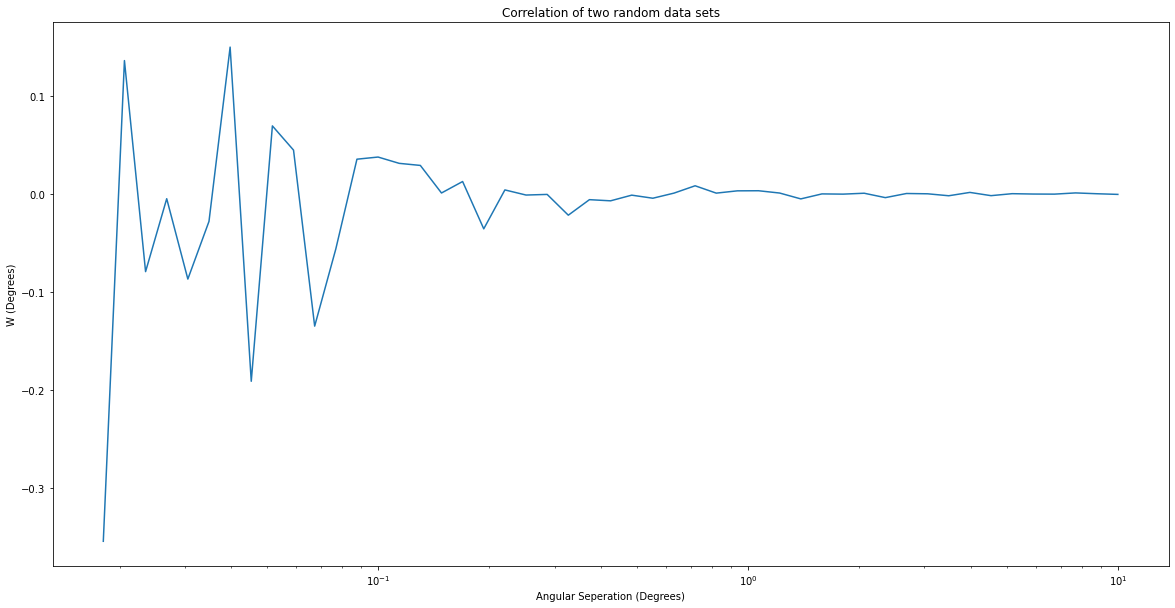

The mean of W is -0.009365574202663941
The minimum value of W is -0.35443037974683544
The maximum value of W is 0.14965986394557823


In [14]:
#Creating a second random set of data
rand_ra2,rand_dec2 = generate_random_ra_dec(np.size(low_Z_spec_galaxies[ok_low_Z,1]), ra_min, ra_max, dec_min, dec_max)

#Computing the autocorrelation for the second random field (I had already done the autocorrelation for the first random field above)
DD_rand2,bins_rand2 = pair_counts(rand_ra2,rand_dec2,rand_ra2,rand_dec2,histogram_bins)

#Computing the correlation between the first and second random field
DR_rand,bins_dr_rand = pair_counts(rand_ra,rand_dec,rand_ra2,rand_dec2,histogram_bins)

#Defining the Landy & Szalay estimator as a function
def landy_szalay_est(DD,DR,RR):
    W=(DD-2*DR+RR)/RR
    return W

#Calculating the value of W for the two random sets of data
W_rand=landy_szalay_est(DD_rand,DR_rand,DD_rand2)

#Plotting the semilog plot
plt.figure(figsize=(20,10))
plt.semilogx(bins[1:],W_rand)
plt.title("Correlation of two random data sets")
plt.xlabel("Angular Seperation (Degrees)")
plt.ylabel("W (Degrees)")
plt.show()

#Calculating the mean of the value of W to show that it is indeed very close to 0
print("The mean of W is", np.mean(W_rand))
print("The minimum value of W is", np.amin(W_rand))
print("The maximum value of W is", np.amax(W_rand))


In [15]:
#As we can see, the correlation is almost 0, with a minimum and maximum of approximately 0.2
#(the minimum and maximum values change each time the second random data set is generated)
#In addition, the mean of W is almost zero, with a value of around 0.003

#The values of W are not exactly 0 due to random noise.
#However, after recomputing the second random data set several times and comparing the graphs to each other, I found that there is no discernable pattern between the noise of the plots (other than the fact that the amplitude decreases as the angular seperation increases).
#Therefore, especially when compared to the large count values of the previous graphs, we can say that the values of W are effectively 0.

#The reason that the two random datasets must be distinct is because:
#If they were the same, we can imagine D and R being equal
#Then the equation would be (DD - 2*DD + DD)/DD which would equal 0 no matter what the value of DD is.
#Therefore, the two random datasets must be generated twice with different seeds in order for the correlation result to be meaningful.


## Exercise

Compute the correlation function for the data and plot on log-log plots.  Compare this to [Figure 1](https://arxiv.org/pdf/astro-ph/0107417.pdf#page=7).



initilized binning


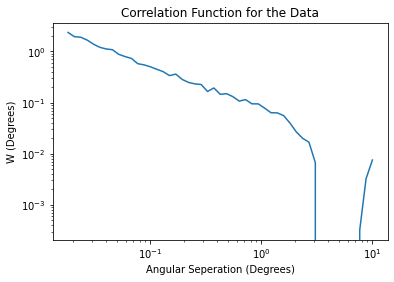

In [16]:
#Compute cross correlation between data and a random dataset
DR,bins_dr = pair_counts(data_ra,data_dec,rand_ra,rand_dec,histogram_bins)

#Compute the correlation (as per between the Landy & Szalay estimator) betweem the data and the first random dataset
W_data=landy_szalay_est(DD,DR,DD_rand)

#Plot the data in a log-log plot
plt.loglog(bins[1:],W_data)
plt.title("Correlation Function for the Data")
plt.xlabel("Angular Seperation (Degrees)")
plt.ylabel("W (Degrees)")
plt.show()

## Exercise and Discussion

(1) Did you recover the correct slope of the power spectrum?

(2) If the probability exceeds random at some scales, it must be below random on others.  Thus the dip at a few degree scales is real and corresponds to voids.

(3) Did you recover the correct normalization?  If not, why might it be off?

In [17]:
#By comparing the above plot to Figure 1 of the paper, we see that the two plots are very similar.
#The scale of the data is very similar on both the x and y axis between the two graphs (i.e. the normalization is correct).

#The behaviour of the graphs are very similar:
#Between the lowest angular seperation and an angular seperation of around 3, both graphs feature a line of approximately constant slope (Although there is more noise in my plot). The slope of this section of the graph in the paper and the slope in my plot are very similar.
#At an angular seperation of around 3, the value of W sharply drops to 0 (indicating a void).
#The main difference in my plot is that the value of W briefly returns above zero at an angular resolution of around 9 degrees.
#This feature is not visible in the paper's figure.

## Exercise

Compute the angular two point function from a higher redshift slice.   Plot the low and high-redshift results aginst each other. Do they agree or not?  Why might explain the differences?

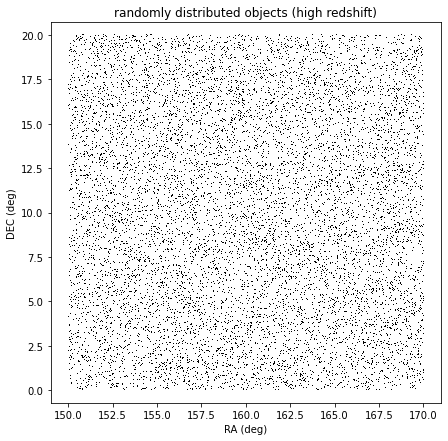

initilized binning


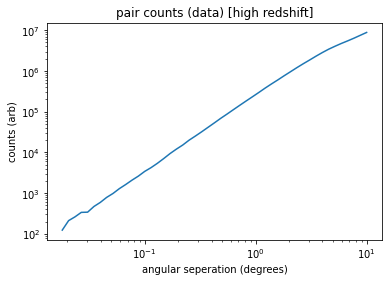

initilized binning
initilized binning


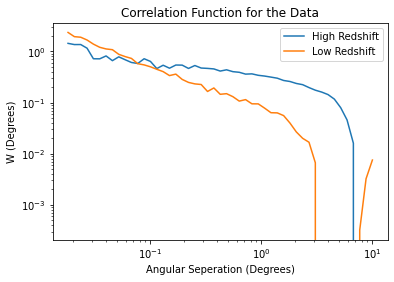

In [18]:
## generate a randomly distribtued set of objects in the same RA, 
## DEC range, and with the same number of objets as our high Z sample
rand_ra_high,rand_dec_high = generate_random_ra_dec(np.size(high_Z_spec_galaxies[ok_high_Z,1]),
                                          ra_min, ra_max, dec_min, dec_max)

## plot this randomly distribtued simulation
plt.figure(figsize=(7,7))

plt.plot(rand_ra_high,rand_dec_high,"k,")
plt.title("randomly distributed objects (high redshift)")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

# choosing the data to pass into the pair counts
data_ra_high  = high_Z_spec_galaxies[ok_high_Z,1]
data_dec_high = high_Z_spec_galaxies[ok_high_Z,2]

## calcualte the autocorrelation for the Data
DD_data_high,bins_high = pair_counts(data_ra_high,data_dec_high,data_ra_high,data_dec_high,histogram_bins)

## plot the pair count histogram for the Data
plt.loglog(bins_high[1:],DD_data_high)
plt.title("pair counts (data) [high redshift]")
plt.xlabel("angular seperation (degrees)")
plt.ylabel("counts (arb)")
plt.show()

#calculating autocorrelation for random data
DD_rand_high,bins_rand_high = pair_counts(rand_ra_high,rand_dec_high,rand_ra_high,rand_dec_high,histogram_bins)

#Compute cross correlation between data and a random dataset
DR_high,bins_dr_high = pair_counts(data_ra_high,data_dec_high,rand_ra_high,rand_dec_high,histogram_bins)

#Compute the correlation (as per between the Landy & Szalay estimator) betweem the data and the first random dataset
W_data_high=landy_szalay_est(DD_data_high,DR_high,DD_rand_high)

#Plot the data in a log-log plot
plt.loglog(bins_high[1:],W_data_high,label="High Redshift")
plt.loglog(bins[1:],W_data,label="Low Redshift")
plt.title("Correlation Function for the Data")
plt.xlabel("Angular Seperation (Degrees)")
plt.ylabel("W (Degrees)")
plt.legend(loc='upper right')
plt.show()


In [19]:
#Although the graphs of the low redshift and high redshift slice are similar, there are several important distinctions between the two that can be noticed.
#Firstly, the slope of the high redshift slice is lower in magnitude than that of the low redshift slice.
#In addition, the two graphs have a slightly different y-intercept; the value of W at an angular seperation of 0 is lower in the high redshift value.
#Furthermore, the cutoff value of the angular seperation for the high redshift slice is larger than that of the low redshift slice.

#Despite these differences, the trend of the graph is similar:
#Both graphs have an initial downward trending slope going from an angular seperation of 0 to a cutoff angular seperation value, at which point the value of W rapidly drops to 0.

#The lower slope in the high redshift slice means that the change in correlation with respect to angular seperation decreases as the redshift of the galaxies increases.
#In other words, this means that there is less clumpiness at higher redshift values (the reason for this was explained in the first exercise).
#Therefore, these results match our earlier predictions.

#The higher cutoff value of the angular resolution implies that clumping is present on larger scales than on smaller scales for higher redshift galaxies.
#Since the force of gravity causes large areas of overdensities and underdensities to form more compact structures like filaments and sheets, one can see that there would be more structure on a large scale at higher redshift values.
#As a result, the maximum angular seperation where clumping still occurs decreases over time (i.e. decreases with decreasing redshift).
#This is in accordance with the data we observe.

#Finally, the high y-intercept value for the low redshift slice shows that there is more clumping on smaller scales in the lower redshift slice (closer to the present), as we previously mentioned.

## Exercise

Now divide the samples into several different bins based on the galaxy magnitudes. 
Compute and plot the correlation functions. What trends do you see? What is the cause of this?

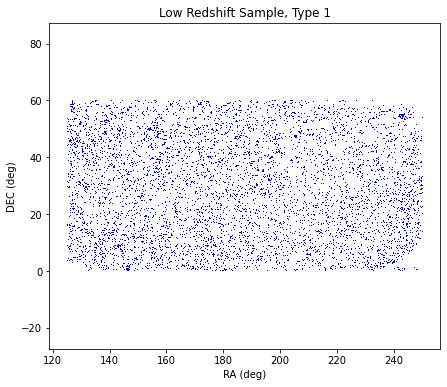

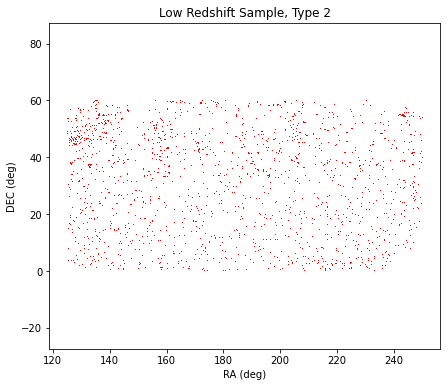

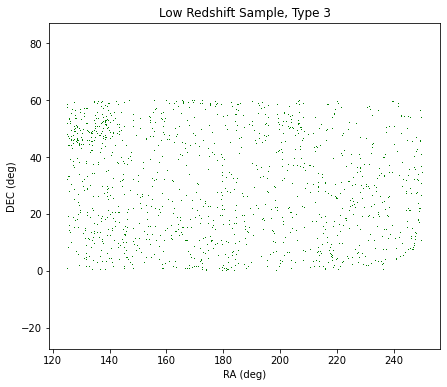

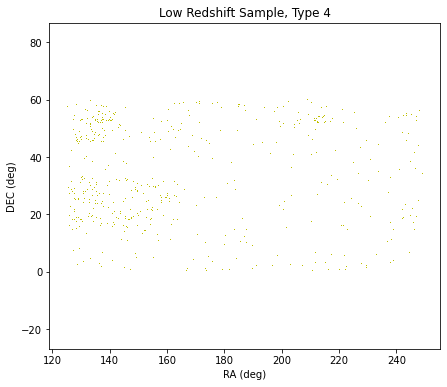

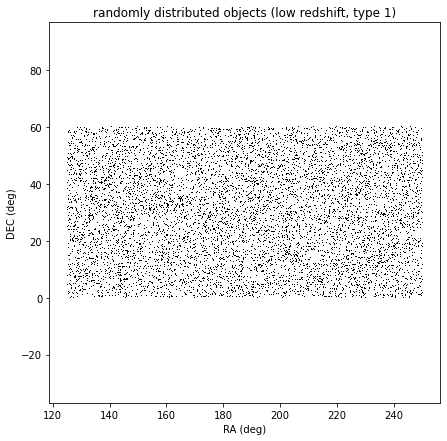

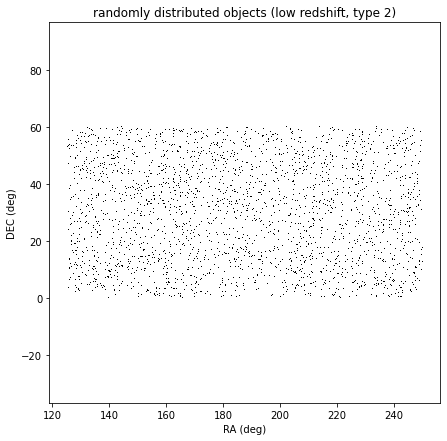

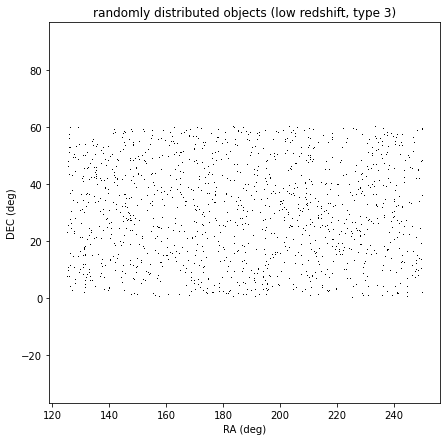

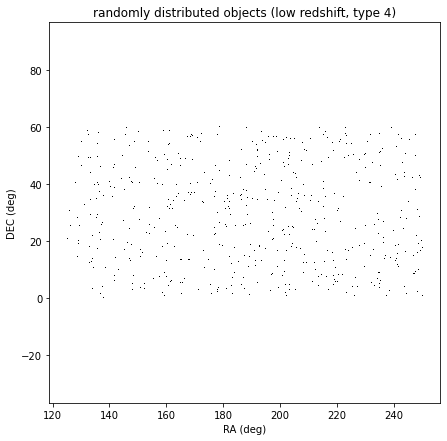

initilized binning
initilized binning
initilized binning
initilized binning


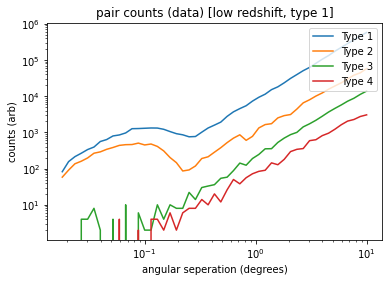

initilized binning
initilized binning
initilized binning
initilized binning
initilized binning
initilized binning
initilized binning
initilized binning


/tmp/ipykernel_399/3299894422.py:12: RuntimeWarning: divide by zero encountered in true_divide
  W=(DD-2*DR+RR)/RR
/tmp/ipykernel_399/3299894422.py:12: RuntimeWarning: invalid value encountered in true_divide
  W=(DD-2*DR+RR)/RR


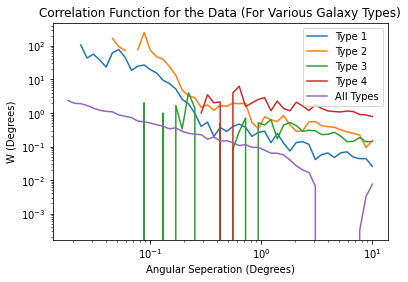

In [20]:
#Defining a function that selects objects within a certain magnitude and radec range
def select_objects_in_magnitude_and_radec_range(map_,mag_min,mag_max):
    dec_ok_mag = np.logical_and(map_[:,3] > mag_min,map_[:,3] < mag_max)
    ra_ok_mag  = np.logical_and(map_[:,3] > mag_min,map_[:,3] < mag_max)
    dec_ok = np.logical_and(map_[:,1] > ra_min,map_[:,1] < ra_max)
    ra_ok  = np.logical_and(map_[:,2] > dec_min,map_[:,2] < dec_max)
    ok = np.where(np.logical_and.reduce([dec_ok, ra_ok, dec_ok_mag, ra_ok_mag]))
    return(np.ravel(ok))

#These magnitude and colour ranges were found from the earlier graph of colour vs magnitude
mag_min_type1=18
mag_max_type1=19

mag_min_type2=19
mag_max_type2=20

mag_min_type3=20
mag_max_type3=21

mag_min_type4=21
mag_max_type4=22

#Sorting the objects into different bins
ra_min = 125
ra_max = 250
dec_min = 0
dec_max = 60
ok_low_Z_type1 = select_objects_in_magnitude_and_radec_range(low_Z_spec_galaxies,mag_min_type1,mag_max_type1)
ok_low_Z_type2 = select_objects_in_magnitude_and_radec_range(low_Z_spec_galaxies,mag_min_type2,mag_max_type2)
ok_low_Z_type3 = select_objects_in_magnitude_and_radec_range(low_Z_spec_galaxies,mag_min_type3,mag_max_type3)
ok_low_Z_type4 = select_objects_in_magnitude_and_radec_range(low_Z_spec_galaxies,mag_min_type4,mag_max_type4)

#plotting the spatial distributions of the first type of galaxies
plt.figure(figsize=(7,6))
plt.plot(low_Z_spec_galaxies[ok_low_Z_type1,1],low_Z_spec_galaxies[ok_low_Z_type1,2],"b,",ms=100)
plt.title("Low Redshift Sample, Type 1")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

#plotting the spatial distributions of the second type of galaxies
plt.figure(figsize=(7,6))
plt.plot(low_Z_spec_galaxies[ok_low_Z_type2,1],low_Z_spec_galaxies[ok_low_Z_type2,2],"r,",ms=100)
plt.title("Low Redshift Sample, Type 2")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

#plotting the spatial distributions of the third type of galaxies
plt.figure(figsize=(7,6))
plt.plot(low_Z_spec_galaxies[ok_low_Z_type3,1],low_Z_spec_galaxies[ok_low_Z_type3,2],"g,",ms=100)
plt.title("Low Redshift Sample, Type 3")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

#plotting the spatial distributions of the fourth type of galaxies
plt.figure(figsize=(7,6))
plt.plot(low_Z_spec_galaxies[ok_low_Z_type4,1],low_Z_spec_galaxies[ok_low_Z_type4,2],"y,",ms=100)
plt.title("Low Redshift Sample, Type 4")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

## generate a randomly distribtued set of objects in the same RA, 
## DEC range, and with the same number of objets as our low Z sample of types 1, 2, 3, and 4
rand_ra_low_type1,rand_dec_low_type1 = generate_random_ra_dec(np.size(low_Z_spec_galaxies[ok_low_Z_type1,1]),
                                          ra_min, ra_max, dec_min, dec_max)
rand_ra_low_type2,rand_dec_low_type2 = generate_random_ra_dec(np.size(low_Z_spec_galaxies[ok_low_Z_type2,1]),
                                          ra_min, ra_max, dec_min, dec_max)
rand_ra_low_type3,rand_dec_low_type3 = generate_random_ra_dec(np.size(low_Z_spec_galaxies[ok_low_Z_type3,1]),
                                          ra_min, ra_max, dec_min, dec_max)
rand_ra_low_type4,rand_dec_low_type4 = generate_random_ra_dec(np.size(low_Z_spec_galaxies[ok_low_Z_type4,1]),
                                          ra_min, ra_max, dec_min, dec_max)

## plot these randomly distribtued simulations
#type 1
plt.figure(figsize=(7,7))
plt.plot(rand_ra_low_type1,rand_dec_low_type1,"k,")
plt.title("randomly distributed objects (low redshift, type 1)")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

#type 2
plt.figure(figsize=(7,7))
plt.plot(rand_ra_low_type2,rand_dec_low_type2,"k,")
plt.title("randomly distributed objects (low redshift, type 2)")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

#type 3
plt.figure(figsize=(7,7))
plt.plot(rand_ra_low_type3,rand_dec_low_type3,"k,")
plt.title("randomly distributed objects (low redshift, type 3)")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()

#type 4
plt.figure(figsize=(7,7))
plt.plot(rand_ra_low_type4,rand_dec_low_type4,"k,")
plt.title("randomly distributed objects (low redshift, type 4)")
plt.xlabel("RA (deg)")
plt.ylabel("DEC (deg)")
plt.axis("equal")
plt.show()


# choosing the data to pass into the pair counts
data_ra_low_type1  = low_Z_spec_galaxies[ok_low_Z_type1,1]
data_dec_low_type1 = low_Z_spec_galaxies[ok_low_Z_type1,2]

data_ra_low_type2  = low_Z_spec_galaxies[ok_low_Z_type2,1]
data_dec_low_type2 = low_Z_spec_galaxies[ok_low_Z_type2,2]

data_ra_low_type3  = low_Z_spec_galaxies[ok_low_Z_type3,1]
data_dec_low_type3 = low_Z_spec_galaxies[ok_low_Z_type3,2]

data_ra_low_type4  = low_Z_spec_galaxies[ok_low_Z_type4,1]
data_dec_low_type4 = low_Z_spec_galaxies[ok_low_Z_type4,2]


## calcualte the autocorrelation for the Data
DD_data_low_type1,bins_low_type1 = pair_counts(data_ra_low_type1,data_dec_low_type1,data_ra_low_type1,data_dec_low_type1,histogram_bins)
DD_data_low_type2,bins_low_type2 = pair_counts(data_ra_low_type2,data_dec_low_type2,data_ra_low_type2,data_dec_low_type2,histogram_bins)
DD_data_low_type3,bins_low_type3 = pair_counts(data_ra_low_type3,data_dec_low_type3,data_ra_low_type3,data_dec_low_type3,histogram_bins)
DD_data_low_type4,bins_low_type4 = pair_counts(data_ra_low_type4,data_dec_low_type4,data_ra_low_type4,data_dec_low_type4,histogram_bins)


## plot the pair count histograms for the Data sets
plt.loglog(bins_low_type1[1:],DD_data_low_type1,label="Type 1")
plt.loglog(bins_low_type2[1:],DD_data_low_type2,label="Type 2")
plt.loglog(bins_low_type3[1:],DD_data_low_type3,label="Type 3")
plt.loglog(bins_low_type4[1:],DD_data_low_type4,label="Type 4")
plt.title("pair counts (data) [low redshift, type 1]")
plt.xlabel("angular seperation (degrees)")
plt.ylabel("counts (arb)")
plt.legend(loc='upper right')
plt.show()

#calculating autocorrelations for random datasets
DD_rand_low_type1,bins_rand_low_type1 = pair_counts(rand_ra_low_type1,rand_dec_low_type1,rand_ra_low_type1,rand_dec_low_type1,histogram_bins)
DD_rand_low_type2,bins_rand_low_type2 = pair_counts(rand_ra_low_type2,rand_dec_low_type2,rand_ra_low_type2,rand_dec_low_type2,histogram_bins)
DD_rand_low_type3,bins_rand_low_type3 = pair_counts(rand_ra_low_type3,rand_dec_low_type3,rand_ra_low_type3,rand_dec_low_type3,histogram_bins)
DD_rand_low_type4,bins_rand_low_type4 = pair_counts(rand_ra_low_type4,rand_dec_low_type4,rand_ra_low_type4,rand_dec_low_type4,histogram_bins)

#Compute cross correlation between data and a random dataset
DR_low_type1,bins_dr_low_type1 = pair_counts(data_ra_low_type1,data_dec_low_type1,rand_ra_low_type1,rand_dec_low_type1,histogram_bins)
DR_low_type2,bins_dr_low_type2 = pair_counts(data_ra_low_type2,data_dec_low_type2,rand_ra_low_type2,rand_dec_low_type2,histogram_bins)
DR_low_type3,bins_dr_low_type3 = pair_counts(data_ra_low_type3,data_dec_low_type3,rand_ra_low_type3,rand_dec_low_type3,histogram_bins)
DR_low_type4,bins_dr_low_type4 = pair_counts(data_ra_low_type4,data_dec_low_type4,rand_ra_low_type4,rand_dec_low_type4,histogram_bins)

#Compute the correlation (as per between the Landy & Szalay estimator) betweem the data and the first random dataset
W_data_low_type1=landy_szalay_est(DD_data_low_type1,DR_low_type1,DD_rand_low_type1)
W_data_low_type2=landy_szalay_est(DD_data_low_type2,DR_low_type2,DD_rand_low_type2)
W_data_low_type3=landy_szalay_est(DD_data_low_type3,DR_low_type3,DD_rand_low_type3)
W_data_low_type4=landy_szalay_est(DD_data_low_type4,DR_low_type4,DD_rand_low_type4)

#Plot the data in a log-log plot
plt.loglog(bins_low_type1[1:],W_data_low_type1,label="Type 1")
plt.loglog(bins_low_type2[1:],W_data_low_type2,label="Type 2")
plt.loglog(bins_low_type3[1:],W_data_low_type3,label="Type 3")
plt.loglog(bins_low_type4[1:],W_data_low_type4,label="Type 4")
plt.loglog(bins[1:],W_data,label="All Types")
plt.title("Correlation Function for the Data (For Various Galaxy Types)")
plt.xlabel("Angular Seperation (Degrees)")
plt.ylabel("W (Degrees)")
plt.legend(loc='upper right')
plt.show()

In [21]:
#I have seperated the galaxies into 4 bins in terms of red magnitude:
#The first bin is values from magnitude values from 18 to 19
#The second bin is values from magnitude values from 19 to 20
#The third bin is values from magnitude values from 20 to 21
#The four bin is values from magnitude values from 21 to 22

#Note that I had selected different minimum and maximum RA and DEC values for the different bins.
#In particular, the third bin uses a significantly smaller sample size while the first, second, and fourth bins use the entire data set.
#This is because the third bin includes the overwhelming majority of galaxies, and performing calculations with the entire dataset was taking too long.
#On the other hand, I could not use a small sample size for the first, second, and fourth bins because then there were too few points, which meant that a straight line could not be plotted in the correlation function graph.
#Instead, if I had too few data points, the lines would appear choppy and it was hard to extract trends from them.
#Thus, to solve this, I only used a small sample size for the third bin and large sample sizes for the other bins. This drastically reduced the computation time while producing the most accurate trends.

#Overall, the correlations for each of the magnitude bins are higher than all of the data combined.
#More specifically, the correlation of type 3 galaxies is the highest, followed by type 2, and type 4 and 1 have approximately the same correlation values.
#This may be a result of galaxies with a similar magnitude clumping to each other.

#Furthermore, the slope of the graphs are still downward and constant, but the rate of change of a lower magnitude.
#This indicates that there is less change in clumping as a function of angular seperation, so the distribution is a bit more uniform (similarly to the higher redshift slice).
#I am not exactly sure what might be causing this.

#However, there are some differences between the overall correlation and the correlation of the magnitude bins.
#Notably, the lines appear to cut off at angular resolution values below 10^-1 degrees for Types 2,3,4, and around 3 degrees for type 1.
#This could be due to the lack of data given the low number of galaxies in each bin.
#The fact that the trends become noisier as the angular seperation decreases leads me to believe this.

#Furthermore, there is no gap at angular resolution values above 3 degrees in any of the magnitude bin calculations.
#Thus, although there is a void in galaxies in general, the correlation between the individual types of galaxies remains the same.

## Exercise (extension)

Keir Rogers

With high quality data it is possible to measure the BAO peak (150 Mpc, ~2 degrees at z = 2) with the angular correlation function.  However, a better method is to compute the three dimensional power correlation.  To do this one needs to convert the positional information to spatial cooordinates which requires accounting for distance (redshift) and the cosmological evolution of the scale factor. Once the data are in spatial coordinates (eg., Mpc for X,Y,Z) then one can compute the 3d correlation using methods nearly identical to those presented above.  This is left as an optional and advanced excercise to the stduent.

We hope this exercise has given you familarity with the evolution of large scale structure as it can be seen in spectroscopic data.  We also hope we have demystified the 2pt correlation function.

In order to try writing a 3D two-point correlation function code, we can simplify the input by using the 3D positions of dark matter halos in a cosmological simulation at a fixed redshift (z = 0, i.e., today). A dark matter halo is a concentration of dark matter in which a galaxy sits.

In [21]:
#Load simulated halo catalogue
halos = np.load('Trial_PP_halo_catalog_1024Mpc_n2048.npy')

## column ids
# 0  x (position in units of Mpc / h)
# 1  y (position in units of Mpc / h)
# 2  z (position in units of Mpc / h)


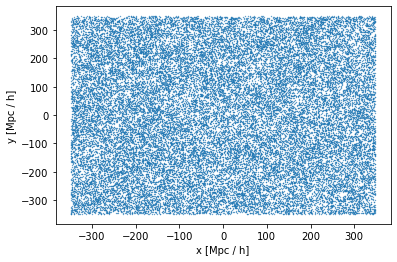

Text(0.5, 0, 'z [Mpc / h]')

<Figure size 432x288 with 0 Axes>

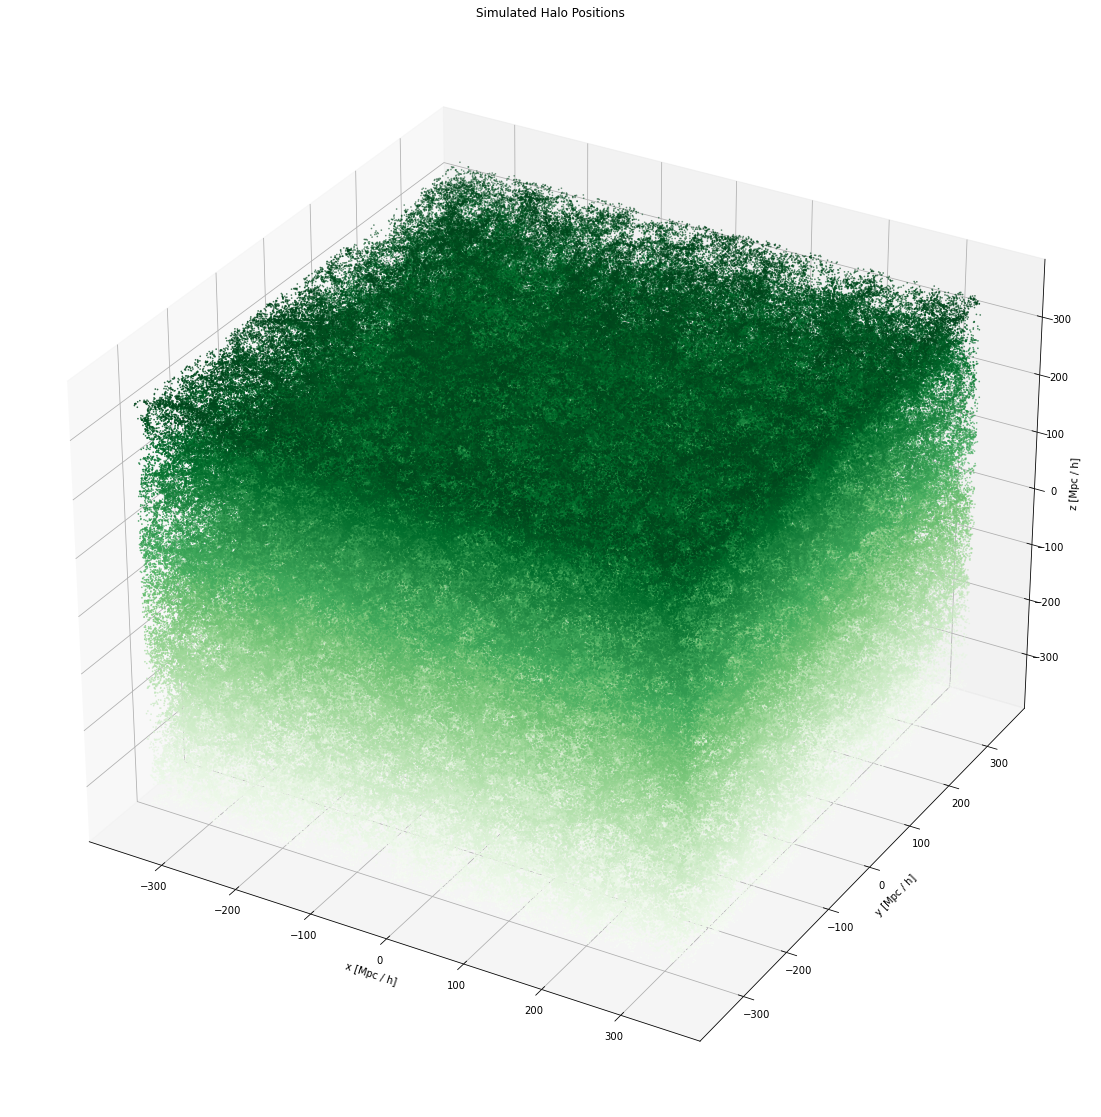

In [22]:
#Let's visualise the halo positions (z direction projected)
plt.scatter(halos[::50, 0], halos[::50, 1], s=0.1) #Only plotting every 50th halo to make plot legible
plt.xlabel('x [Mpc / h]')
plt.ylabel('y [Mpc / h]')
plt.show()

#3d visualization
fig = plt.figure()
plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.scatter3D(halos[::1, 0], halos[::1, 1], halos[::1, 2], s=0.05, c=halos[::1, 2], cmap='Greens')
plt.title("Simulated Halo Positions")
ax.set_xlabel('x [Mpc / h]')
ax.set_ylabel('y [Mpc / h]')
ax.set_zlabel('z [Mpc / h]')

By visualizing the data in 3d, I was able to more clearly see the filaments in the 3 dimensional structure.

## Exercise (extension)

The extension is to measure the 3D two-point correlation function of this halo catalogue using the methods introduced above.

i) You will need to generate a new set of randoms, which should contain the same number of halos, randomly drawn from a uniform distribution in a 3D box the same size as the catalogue.

ii) You will need to histogram pair counts again (DD, DR, RR), but now as a function of the Euclidean distance between points (r = sqrt(delta_x ^ 2 + delta_y ^ 2 + delta_z ^ 2)).

iii) Use the Landy-Szalay estimator to calculate the 3D two-point correlation function as before, but now as a function of r. Do the same test as above by checking that the correlation between two separate random catalogues = 0.

iv) Compare your results to before and comment on any similarities and differences.

NOTE: there should be 229402 halos in the catalogue provided. As above, in order to make the calculation computationally feasible, do the analysis here on a sub-volume of the full catalogue. Choose this sub-volume such that it contains about 20000 objects as before.


-174.07927
174.07779
-174.07991
174.07237
-174.07944
174.07939


Text(0.5, 0, 'z [Mpc / h]')

<Figure size 432x288 with 0 Axes>

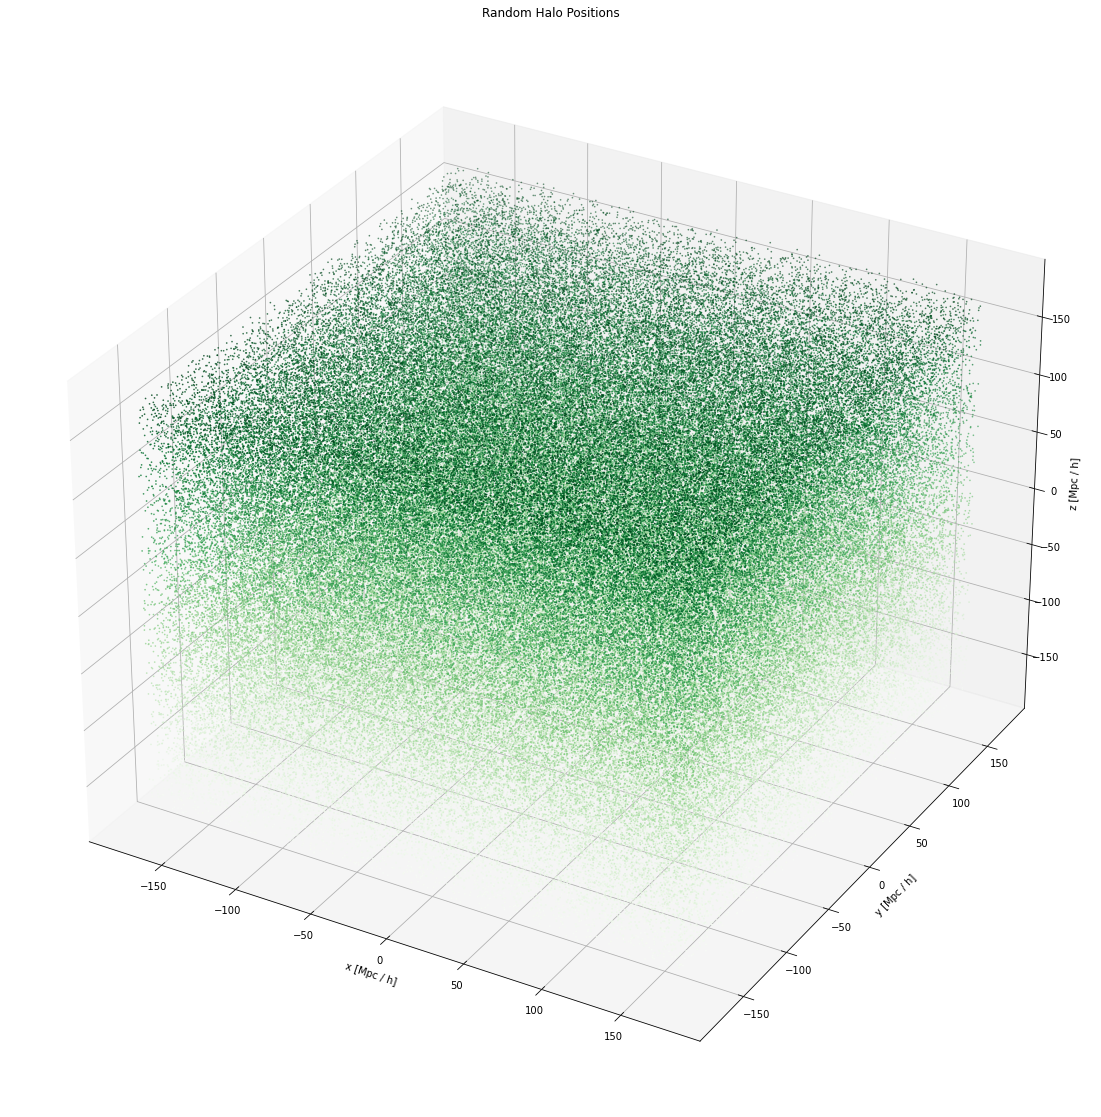

In [24]:
#i)
# function to generate x, y, and z coordinates for N random objects in a square box in x, y, and z
def generate_random_xyz(N,x_min, x_max, y_min, y_max, z_min, z_max):
    x = np.random.uniform(low = x_min, high = x_max, size = N)
    y = np.random.uniform(low = y_min, high = y_max, size = N)
    z = np.random.uniform(low = z_min, high = z_max, size = N)
    return(x,y,z)

x_min=np.amin(halos[::1, 0])
x_max=np.amax(halos[::1, 0])
y_min=np.amin(halos[::1, 1])
y_max=np.amax(halos[::1, 1])
z_min=np.amin(halos[::1, 2])
z_max=np.amax(halos[::1, 2])

print(x_min)
print(x_max)
print(y_min)
print(y_max)
print(z_min)
print(z_max)

## generate a randomly distribtued set of objects in the same xyz range, and with the same number of objects as our simulation
rand_x,rand_y,rand_z = generate_random_xyz(np.size(halos[::1, 0]), x_min, x_max, y_min, y_max, z_min, z_max)


## plot this randomly distribtued simulation
fig = plt.figure()
plt.figure(figsize=(20,20))
ax = plt.axes(projection='3d')
ax.scatter3D(rand_x, rand_y, rand_z, s=0.5, c=rand_z, cmap='Greens');
plt.title("Random Halo Positions")
ax.set_xlabel('x [Mpc / h]')
ax.set_ylabel('y [Mpc / h]')
ax.set_zlabel('z [Mpc / h]')

In [34]:
#ii)
#defining normal direction (i.e. line of sight)
line_of_sight=[0,0,1]

#defining pair counts function for 3D
def pair_counts_3d(x1,y1,z1,x2,y2,z2,histogram_bins_3d,histogram_bins_angle):
    #setting up the arrays so that they work
    x1  = np.ravel(x1)
    x2  = np.ravel(x2)
    y1 = np.ravel(y1)
    y2 = np.ravel(y2)
    z1 = np.ravel(z1)
    z2 = np.ravel(z2)
    N_3d = np.size(x1)
    print(N_3d)
    #-----------
    #-----------
    i = 0
    while (i < N_3d):
        x_cur = x1[i]
        y_cur = y1[i]
        z_cur = z1[i]
        #define distance and the seperation vector
        distance_3d = np.sqrt((x2 - x_cur)**2 + (y2 - y_cur)**2 + (z2 - z_cur)**2)
        distance_vct = [x2 - x_cur,y2 - y_cur,z2 - z_cur]
        if i%100 == 0:
            print(i)
            #this is just so i know the progress of the calculation, it usually takes like 20 minutes
        #transpose so that the shapes of the arrays are compatible
        distance_vct=np.transpose(distance_vct)
        #find dot product, then magnitude, then angle
        dot_product=np.dot(distance_vct,line_of_sight)
        norm_angle=distance_3d
        angle = np.arccos(dot_product/(norm_angle))
        distance_3d = distance_3d*((angle/(np.pi/2))**2)
        
        #---------
        #This is where i split up the distance values into their seperate angle groups
        #initialize the stuff
        angle_dict = {}
        distance_3d_filter = {}
        x=0
        #then the loop
        while (x < len(histogram_bins_angle)-1):
            angle_dict["group%s" %x] = np.where((histogram_bins_angle[x+1] > angle) & (angle > histogram_bins_angle[x]))
            #angle_group = np.where((histogram_bins_angle[x+1] > angle) & (angle > histogram_bins_angle[x]))
            #print(angle_group)
            # 
            distance_3d_filter["group%s" %x] = distance_3d[angle_dict["group%s" %x]]
            #distance_3d_filter = distance_3d[angle_group]
            #print(distance_3d_filter)
            x+=1
        #print(distance_3d_filter)
        #print(len(distance_3d_filter))
        #print(distance_3d_filter)
        #----------
        #x=0
        ############while (x < N_3d):
            ######dot_product=np.dot(distance_vct[x],line_of_sight)
            ######angle[x] = np.arccos(dot_product)
            ######x+=1
            
    
        #SETUP
        if i == 0:
            w=0
            histogram_out_3d_dict = {}
            bin_edges_3d_dict = {}
            while (w < len(distance_3d_filter)):
                #print(w)
                histogram_out_3d_dict["group%s" %w], bin_edges_3d_dict["group%s" %w] = np.histogram(distance_3d_filter["group%s" %w],bins = histogram_bins_3d)
                w+=1
            histogram_out_angle, bin_edges_angle = np.histogram(angle,bins = histogram_bins_angle)
            print("initilized binning")
        
        #CURRENT HISTOGRAM

        histogram_cur_3d_dict = {}
        r=0
        while (r < len(distance_3d_filter)-1):
            histogram_cur_3d_dict["group%s" %r], bin_edges_3d_dict["group%s" %r] = np.histogram(distance_3d_filter["group%s" %r],bins = histogram_bins_3d)
            r+=1
            
        #TOTAL HISTOGRAM
        
        d=0
        while (d < len(distance_3d_filter)-1):
            histogram_out_3d_dict["group%s" %d] += histogram_cur_3d_dict["group%s" %d]
            d+=1
        #histogram_cur_3d, bin_edges_3d = np.histogram(distance_3d,bins = histogram_bins_3d)
        #histogram_out_3d += histogram_cur_3d
        
        #ANGLE HISTOGRAM
        
        histogram_cur_angle, bin_edges_angle = np.histogram(angle,bins = histogram_bins_angle)
        histogram_out_angle += histogram_cur_angle
        i+=1
    return(histogram_out_3d_dict,histogram_out_angle,bin_edges_3d_dict,bin_edges_angle)

## seting up the bins for the pair count
histogram_bins_3d = np.logspace(-1,2.5)

#making bins for the angles, from 0 to 90 degrees  (i.e. 0 to pi/2 radians)
histogram_bins_angle = np.linspace(0,np.pi,5)

# choosing the data to pass into the pair counts
data_x  = halos[::10, 0]
data_y = halos[::10, 1]
data_z = halos[::10, 2]

#
rand_x_sel  = rand_x[::10]
rand_y_sel = rand_y[::10]
rand_z_sel = rand_z[::10]

## calcualte the pair counts for the Data
#DD_3d_data,DD_3d_data_angle,bins_3d_data,bin_3d_data_angle = pair_counts_3d(data_x,data_y,data_z,data_x,data_y,data_z,histogram_bins_3d,histogram_bins_angle)
DD_3d_data,DD_3d_data_angle,bins_3d_data,bin_3d_data_angle = pair_counts_3d(data_x,data_y,data_z,data_x,data_y,data_z,histogram_bins_3d,histogram_bins_angle)


## plot the pair count histogram for the Data

#plt.loglog(bins_3d_data[1:],DD_3d_data)
#plt.title("pair counts (data)")
#plt.xlabel("Seperation (Mpc)")
#plt.ylabel("counts (arb)")
#plt.show()

22941
0
initilized binning


/tmp/ipykernel_118/934398619.py:34: RuntimeWarning: invalid value encountered in true_divide
  angle = np.arccos(dot_product/(norm_angle))


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

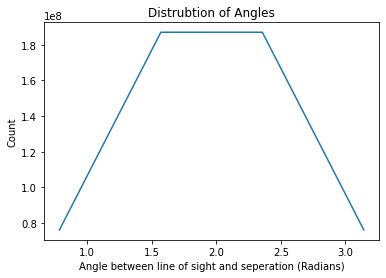

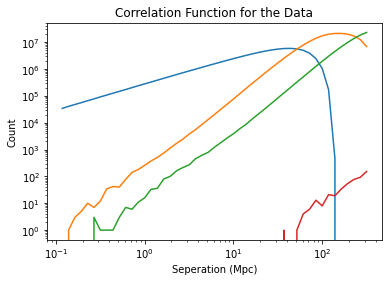

In [35]:
plt.plot(bin_3d_data_angle[1:],DD_3d_data_angle)
plt.title("Distrubtion of Angles")
plt.xlabel("Angle between line of sight and seperation (Radians)")
plt.ylabel("Count")
plt.show()

t=0
while (t < len(histogram_bins_angle)-1):
    plt.loglog(bins_3d_data["group%s" %t][1:],DD_3d_data["group%s" %t])    
    #histogram_out_3d_dict["group%s" %d] += histogram_cur_3d_dict["group%s" %d]
    t+=1
plt.title("Correlation Function for the Data")
plt.xlabel("Seperation (Mpc)")
plt.ylabel("Count")
plt.show()



In [36]:
#iii)
#Selecting the random data
rand_x_sel  = rand_x[::10]
rand_y_sel = rand_y[::10]
rand_z_sel = rand_z[::10]

#Computing the pair count histogram for the random field
#DD_3d_rand,bins_3d_rand = pair_counts_3d(rand_x_sel,rand_y_sel,rand_z_sel,rand_x_sel,rand_y_sel,rand_z_sel,histogram_bins_3d)
DD_3d_data_rand,DD_3d_data_angle_rand,bins_3d_data_rand,bin_3d_data_angle_rand = pair_counts_3d(rand_x_sel,rand_y_sel,rand_z_sel,rand_x_sel,rand_y_sel,rand_z_sel,histogram_bins_3d,histogram_bins_angle)



#Making a bar plot for both the random and data counts
#The width was set such that the width of each bar increases as x increases (due to the logarithmic scale)
#plt.figure(figsize=(20,10))
#plt.bar(bins_3d_data[1:],DD_3d_data,alpha=0.5, label="Data", width=0.19*np.array(bins_3d_data[1:]), log=True, color="red")
#plt.bar(bins_3d_rand[1:],DD_3d_rand,alpha=0.5, label="Random",width=0.19*np.array(bins_3d_rand[1:]), log=True, color="blue")
#plt.title("Pair Counts Histogram (Data)")
#plt.xlabel("Seperation (Mpc)")
#plt.ylabel("Counts (arb)")
#plt.legend(loc='upper left')
#plt.show()

#Similarly, making a bar plot for the difference between the data and random counts
#plt.figure(figsize=(20,10))
#plt.bar(bins_3d_data[1:],abs(DD_3d_data - DD_3d_rand),width=0.19*np.array(bins_3d_data[1:]),alpha=0.5, log=True)
#plt.title("Difference in Pair Counts Histogram (Data)")
#plt.xlabel("Seperation (Mpc)")
#plt.ylabel("Difference in counts (arb)")
#plt.show()

22941
0
initilized binning


/tmp/ipykernel_118/934398619.py:34: RuntimeWarning: invalid value encountered in true_divide
  angle = np.arccos(dot_product/(norm_angle))


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

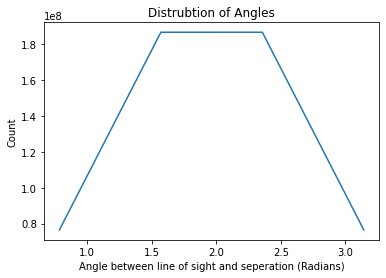

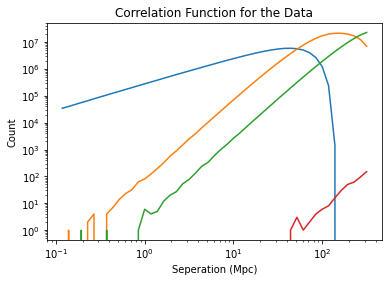

In [37]:
plt.plot(bin_3d_data_angle_rand[1:],DD_3d_data_angle_rand)
plt.title("Distrubtion of Angles")
plt.xlabel("Angle between line of sight and seperation (Radians)")
plt.ylabel("Count")
plt.show()

t=0
while (t < len(histogram_bins_angle)-1):
    plt.loglog(bins_3d_data_rand["group%s" %t][1:],DD_3d_data_rand["group%s" %t])    
    #histogram_out_3d_dict["group%s" %d] += histogram_cur_3d_dict["group%s" %d]
    t+=1
plt.title("Correlation Function for the Data")
plt.xlabel("Seperation (Mpc)")
plt.ylabel("Count")
plt.show()

initilized binning
initilized binning


/tmp/ipykernel_63/3299894422.py:12: RuntimeWarning: divide by zero encountered in true_divide
  W=(DD-2*DR+RR)/RR
/tmp/ipykernel_63/3299894422.py:12: RuntimeWarning: invalid value encountered in true_divide
  W=(DD-2*DR+RR)/RR


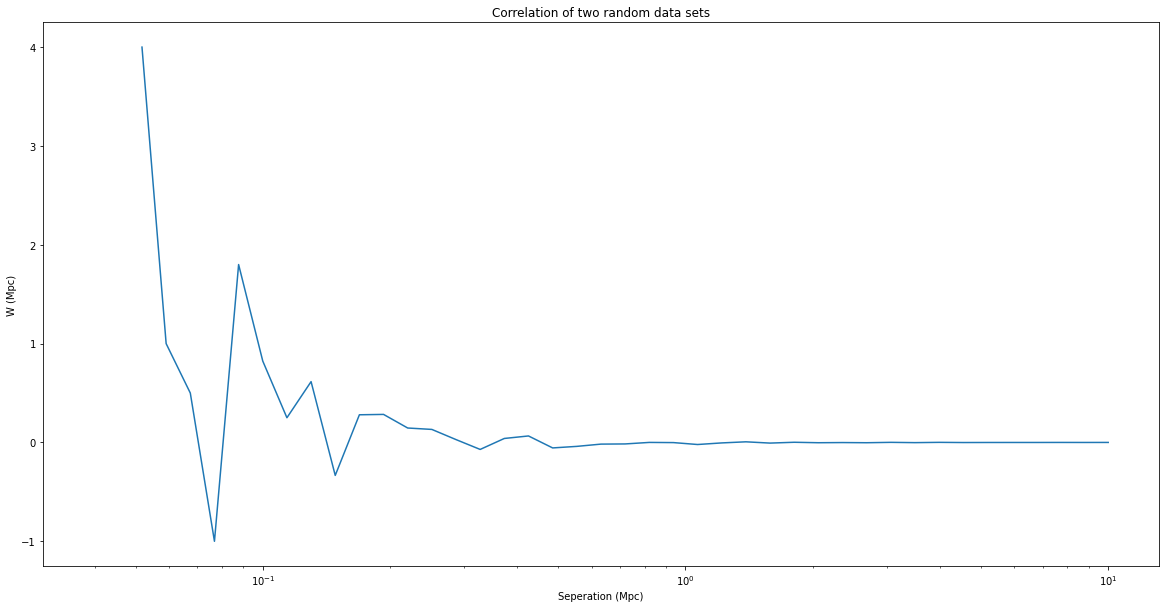

The mean of W is nan
The minimum value of W is nan
The maximum value of W is nan


In [33]:
#iii)

#Creating a second random set of data
rand_x2,rand_y2,rand_z2 = generate_random_xyz(np.size(halos[::1, 0]), x_min, x_max, y_min, y_max, z_min, z_max)
rand_x2_sel = rand_x2[::10]
rand_y2_sel = rand_y2[::10]
rand_z2_sel = rand_z2[::10]

#Computing the autocorrelation for the second random field (I had already done the autocorrelation for the first random field above)
DD_3d_rand2,bins_3d_rand2 = pair_counts_3d(rand_x2_sel,rand_y2_sel,rand_z2_sel,rand_x2_sel,rand_y2_sel,rand_z2_sel,histogram_bins_3d)

#Computing the correlation between the first and second random field
DR_3d_rand,bins_3d_dr_rand = pair_counts_3d(rand_x_sel,rand_y_sel,rand_z_sel,rand_x2_sel,rand_y2_sel,rand_z2_sel,histogram_bins_3d)

#Calculating the value of W for the two random sets of data
W_rand_3d=landy_szalay_est(DD_3d_rand,DR_3d_rand,DD_3d_rand2)

#Plotting the semilog plot
plt.figure(figsize=(20,10))
plt.semilogx(bins[1:],W_rand_3d)
plt.title("Correlation of two random data sets")
plt.xlabel("Seperation (Mpc)")
plt.ylabel("W (Mpc)")
plt.show()

#Calculating the mean of the value of W to show that it is indeed very close to 0
print("The mean of W is", np.mean(W_rand_3d))
print("The minimum value of W is", np.amin(W_rand_3d))
print("The maximum value of W is", np.amax(W_rand_3d))

In [38]:
DR_3d_data,DR_3d_data_angle,bins_3d_dr_data,bin_3d_dr_data_angle = pair_counts_3d(data_x,data_y,data_z,rand_x_sel,rand_y_sel,rand_z_sel,histogram_bins_3d,histogram_bins_angle)


22941
0
initilized binning
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
1

/tmp/ipykernel_118/3299894422.py:12: RuntimeWarning: invalid value encountered in true_divide
  W=(DD-2*DR+RR)/RR
/tmp/ipykernel_118/3299894422.py:12: RuntimeWarning: divide by zero encountered in true_divide
  W=(DD-2*DR+RR)/RR
/tmp/ipykernel_118/3299894422.py:12: RuntimeWarning: invalid value encountered in true_divide
  W=(DD-2*DR+RR)/RR
/tmp/ipykernel_118/3299894422.py:12: RuntimeWarning: divide by zero encountered in true_divide
  W=(DD-2*DR+RR)/RR
/tmp/ipykernel_118/3299894422.py:12: RuntimeWarning: invalid value encountered in true_divide
  W=(DD-2*DR+RR)/RR
/tmp/ipykernel_118/3299894422.py:12: RuntimeWarning: divide by zero encountered in true_divide
  W=(DD-2*DR+RR)/RR
/tmp/ipykernel_118/3299894422.py:12: RuntimeWarning: invalid value encountered in true_divide
  W=(DD-2*DR+RR)/RR


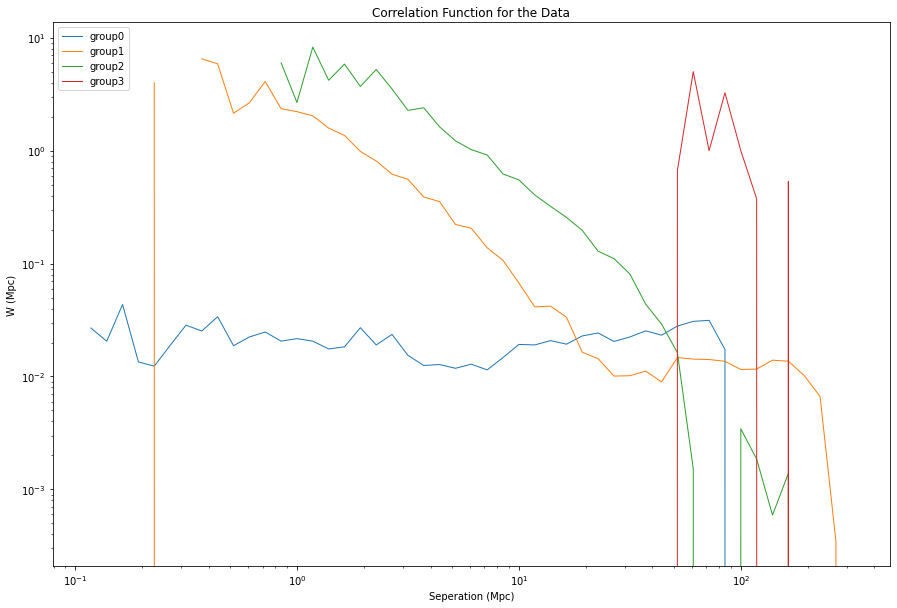

In [44]:
#iv)

#Compute cross correlation between data and a random dataset

#Compute the correlation (as per between the Landy & Szalay estimator) betweem the data and the first random dataset
plt.figure(figsize=(15,10))

W_data_3d_dict={}
p=0
while (p < len(histogram_bins_angle)-1):
    W_data_3d_dict["group%s" %p] = landy_szalay_est(DD_3d_data["group%s" %p],DR_3d_data["group%s" %p],DD_3d_data_rand["group%s" %p])
    plt.loglog(bins_3d_dr_data["group%s" %p][1:],W_data_3d_dict["group%s" %p], lw=1, label="group%s" %p)
    #histogram_out_3d_dict["group%s" %d] += histogram_cur_3d_dict["group%s" %d]
    p+=1
#W_data_3d=landy_szalay_est(DD_3d_data,DR_3d_data,DD_3d_rand)

#Plot the data in a log-log plot
#plt.loglog(bins_3d_dr_data[1:],W_data_3d)
plt.title("Correlation Function for the Data")
plt.xlabel("Seperation (Mpc)")
plt.ylabel("W (Mpc)")
plt.legend(loc='upper left')
plt.show()

In [97]:
print(DR_3d_data)

#np.savez("data NEW.csv", DD_3d_data, delimiter=",")
#np.savez("random NEW.csv", DD_3d_data_rand, delimiter=",")
np.savez("dr NEW.csv", DR_3d_data, delimiter=",")



{'group0': array([       0,        0,        0,        0,        0,        0,
              1,        0,        0,        0,        0,        1,
              0,        3,        4,        5,        6,       18,
             26,       41,       60,       95,      184,      263,
            456,      737,     1310,     2058,     3384,     5343,
           8742,    14444,    23297,    37621,    60671,    98251,
         156793,   250950,   397172,   623888,   981250,  1528798,
        2326651,  3462137,  5049836,  7120231,  9406366, 11001270,
        9598838]), 'group1': array([       0,        0,        0,        0,        0,        1,
              0,        0,        1,        1,        0,        3,
              6,        6,       12,       22,       20,       46,
             68,      113,      203,      334,      510,      867,
           1419,     2279,     3742,     6311,    10037,    16204,
          26495,    43090,    69719,   112206,   181717,   293339,
         466763,   744